In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("SubmissionFile.csv")

In [3]:
train.shape

(23524, 13)

In [4]:
test.shape

(10086, 12)

In [5]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)
print(train.shape, test.shape, data.shape)

(23524, 14) (10086, 13) (33610, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 14 columns):
country                   33610 non-null object
year                      33610 non-null int64
uniqueid                  33610 non-null object
bank_account              23524 non-null object
location_type             33610 non-null object
cellphone_access          33610 non-null object
household_size            33610 non-null int64
age_of_respondent         33610 non-null int64
gender_of_respondent      33610 non-null object
relationship_with_head    33610 non-null object
marital_status            33610 non-null object
education_level           33610 non-null object
job_type                  33610 non-null object
source                    33610 non-null object
dtypes: int64(3), object(11)
memory usage: 3.6+ MB


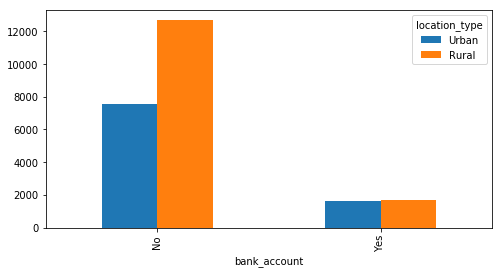

In [7]:
pd.crosstab(data.bank_account, data.location_type)[["Urban","Rural"]].plot(kind='bar',figsize=(8,4))

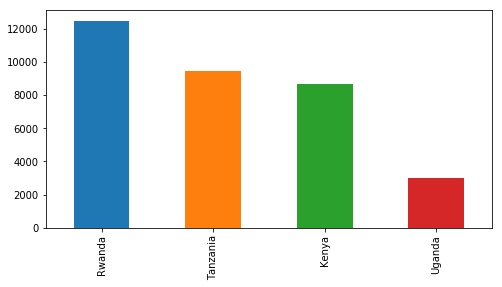

In [8]:
data.country.value_counts().plot(kind='bar',figsize=(8,4))

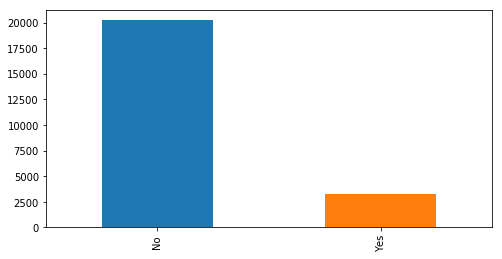

In [9]:
data.bank_account.value_counts().plot(kind='bar',figsize=(8,4))

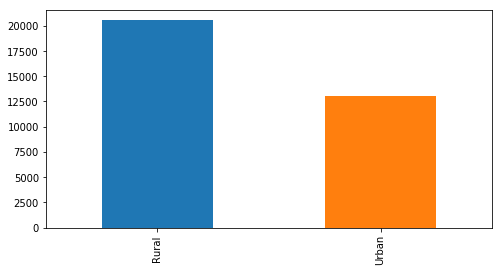

In [10]:
data.location_type.value_counts().plot(kind='bar',figsize=(8,4))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 14 columns):
country                   33610 non-null object
year                      33610 non-null int64
uniqueid                  33610 non-null object
bank_account              23524 non-null object
location_type             33610 non-null object
cellphone_access          33610 non-null object
household_size            33610 non-null int64
age_of_respondent         33610 non-null int64
gender_of_respondent      33610 non-null object
relationship_with_head    33610 non-null object
marital_status            33610 non-null object
education_level           33610 non-null object
job_type                  33610 non-null object
source                    33610 non-null object
dtypes: int64(3), object(11)
memory usage: 3.6+ MB


In [121]:
data.isnull().any()

country                   False
year                      False
uniqueid                  False
bank_account               True
location_type             False
cellphone_access          False
household_size            False
age_of_respondent         False
gender_of_respondent      False
relationship_with_head    False
marital_status            False
education_level           False
job_type                  False
source                    False
dtype: bool

In [131]:
#Divide into test and train:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

#Drop unnecessary columns:
labels = train.bank_account

test.drop(['bank_account', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [132]:
test.shape

(10086, 12)

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = train.columns[train.dtypes == object]
for col in cat:
    train[col] = le.fit_transform(train[col])

train.head()

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,4,9
1,0,2018,6925,0,0,0,5,70,0,1,4,1,4
2,0,2018,11369,1,1,1,5,26,1,3,3,6,9
3,0,2018,14816,0,0,1,5,34,0,1,2,3,3
4,0,2018,18260,0,1,0,8,26,1,0,3,3,5


In [136]:
sample_data = train.sample(frac=0.03, replace=True)
y = sample_data['bank_account']
X = sample_data.drop(['bank_account'], axis=1)
X.shape, y.shape

((706, 12), (706,))

In [139]:
#Searching for the best parameter using GridSearchCV

from sklearn.model_selection import GridSearchCV
gsCV_model = RandomForestRegressor(oob_score=True)

tuned_parameters = {
    'n_estimators': [200],
    'max_features': [2, 4, 8, 10, 'auto'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3,4]
}

gsCV = GridSearchCV(gsCV_model, tuned_parameters, n_jobs=-1, verbose=1)
gsCV.fit(X, y)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  6.0min finished
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
  

In [140]:
print(gsCV.best_score_)
print(gsCV.best_params_)

0.27971044779390275
{'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}


In [141]:
from collections import OrderedDict
from sklearn.datasets import make_classification
ensemble_clfs = [(
    "RandomForestRegressor, max_depth='10', min_samples_split='3', min_samples_leaf=2",
    RandomForestRegressor(
        warm_start=True,
        max_features=4,
        max_depth=20,
        min_samples_split=3,
        min_samples_leaf=1,
        oob_score=True))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 30
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 50):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

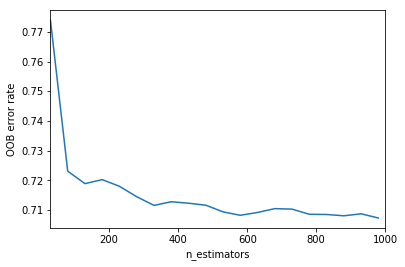

In [142]:
# Generating "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

In [145]:
y = train['bank_account']
X = train.drop(['bank_account'], axis=1)

#splitting to test and train set..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16466, 12), (16466,), (7058, 12), (7058,))

In [148]:
model = RandomForestRegressor(
    max_features=4,
    max_depth=20,
    min_samples_leaf=1,
    oob_score=True,
    min_samples_split=3,
    n_estimators=500,
    n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [149]:
model.score(X_test,y_test)

0.28531646710713476